In [6]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat # Library to get mat files from SVHN Dataset
import matplotlib.image as img # Get images and make them matrices from Celeb A
from os import listdir # Get jpg images from Celeb A
from os.path import isfile, join # Just to get structure of files
from tempfile import TemporaryFile # To save matrix of images
import matplotlib.pyplot as plt

import logging
import os
import cloudstorage as gcs
from google.cloud import storage
# import webapp2
# from google.appengine.api import app_identity
# from google.appengine.api import images
import io
from PIL import Image

In [7]:
from image_gen import ImageCollector
import imageio

In [8]:
client = storage.Client()
# https://console.cloud.google.com/storage/browser/[bucket-id]/
bucket = client.get_bucket('inpainting-final-project')

In [9]:
bucket

<Bucket: inpainting-final-project>

In [10]:
import cv2

In [6]:
# blobs = bucket.list_blobs()

blobs = bucket.list_blobs(prefix='images/Cars/cars_train/')
images = [] 
for blob in blobs:
    blob = bucket.get_blob(blob.name)
    s = blob.download_as_string()
    img = Image.open(io.BytesIO(s))
    resized_img = cv2.resize(np.asarray(img),(64,64))
    if resized_img.shape == (64,64,3):
        images.append(resized_img)
 

In [7]:
images[0]

array([[[ 84, 102, 106],
        [ 94, 112, 116],
        [ 70,  92,  97],
        ...,
        [247, 251, 252],
        [252, 255, 255],
        [247, 253, 253]],

       [[ 84, 102, 106],
        [ 98, 116, 120],
        [ 89, 108, 114],
        ...,
        [244, 253, 252],
        [243, 252, 251],
        [242, 248, 248]],

       [[ 92, 110, 113],
        [ 82, 100, 104],
        [ 87, 104, 110],
        ...,
        [242, 251, 251],
        [239, 249, 248],
        [243, 249, 249]],

       ...,

       [[173, 175, 164],
        [167, 164, 153],
        [166, 166, 158],
        ...,
        [171, 168, 159],
        [173, 169, 161],
        [160, 156, 147]],

       [[173, 175, 164],
        [150, 146, 134],
        [171, 171, 163],
        ...,
        [173, 175, 173],
        [170, 172, 169],
        [175, 176, 178]],

       [[169, 171, 160],
        [161, 157, 145],
        [163, 163, 155],
        ...,
        [ 86,  97, 101],
        [ 82,  93,  97],
        [ 76,  88,  88]]

(675, 900, 3)

In [73]:
# import cv2

# resized_images = []

# for image in images:    
#     resized_img = cv2.resize(image,(64,64))
#     if resized_img.shape == (64,64,3):
#         resized_images.append(resized_img)
    


In [74]:
# for i in resized_images:
#     print(i.shape)

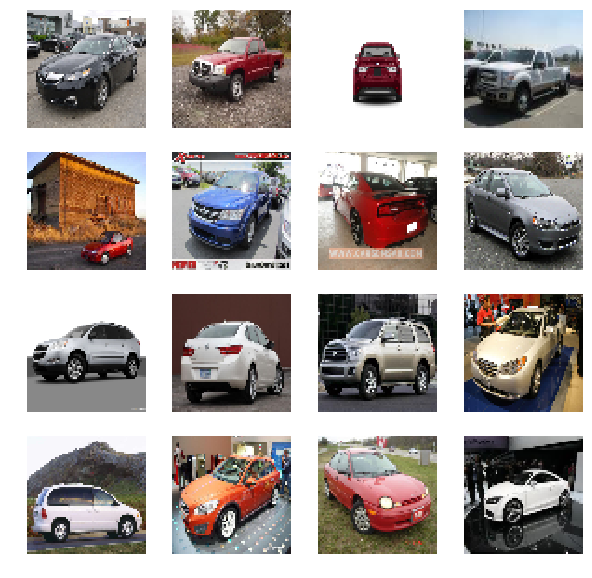

In [8]:
img_col = ImageCollector(np.asarray(images))
img_col.show(np.asarray(images))




In [16]:
# X_train = np.asarray(resized_images)
images[0].shape


(64, 64, 3)

In [11]:
from dcgan_model import DCGAN


In [18]:
tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(images), iters = 1000)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 8126
new size 8126
Step: 0, D_loss: 1.4198328256607056, G_loss: 0.2768388092517853
Step: 10, D_loss: 0.41469910740852356, G_loss: 1.0837831497192383
Step: 20, D_loss: 0.27057918906211853, G_loss: 1.439840316772461
Step: 30, D_loss: 0.030719488859176636, G_loss: 3.4994237422943115
Step: 40, D_loss: 0.0015589960385113955, G_loss: 6.466196537017822
Step: 50, D_loss: 0.00029033730970695615, G_loss: 8.146392822265625
Step: 60, D_loss: 0.07678760588169098, G_loss: 2.621593475341797
Step: 70, D_loss: 0.004045939538627863, G_loss: 5.514492511749268
Step: 80, D_loss: 0.0002828161232173443, G

KeyboardInterrupt: 

In [6]:
blob = bucket.get_blob('images/Cars/cars_train/00001.jpg')

In [7]:
s = blob.download_as_string()

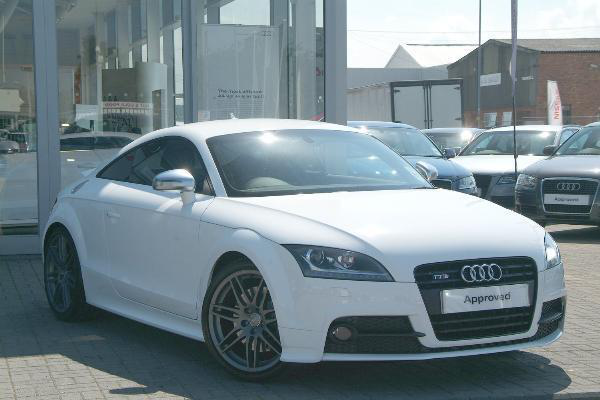

In [8]:
image = Image.open(io.BytesIO(s))
image

In [40]:
np.asarray(image).shape

(400, 600, 3)

In [67]:
t = resized_images[8040]

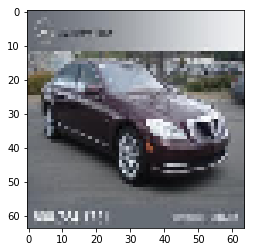

In [68]:
plt.imshow(t)
plt.show()

In [72]:
t.shape == (64,64,3)

True

In [12]:
celeba_blobs = bucket.list_blobs(prefix='images/CelebA/img_align_celeba/')
celeba_images = [] 


try:
    for blob in celeba_blobs:
        blob = bucket.get_blob(blob.name)
        s = blob.download_as_string()
        img = Image.open(io.BytesIO(s))
        resized_img = cv2.resize(np.asarray(img),(64,64))/127.5-1.0
        if resized_img.shape == (64,64,3):
            celeba_images.append(resized_img)
except:
    pass

In [14]:
# celeba_images[0]

In [15]:
len(celeba_images)

776

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

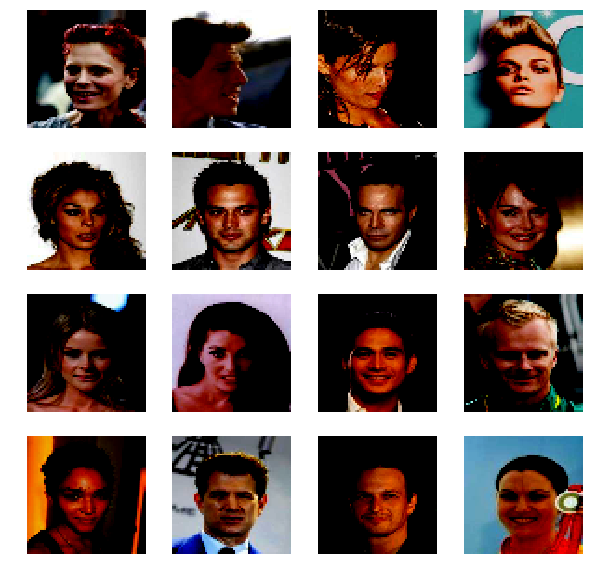

In [16]:
img_col = ImageCollector(np.asarray(celeba_images))
img_col.show(np.asarray(celeba_images))

In [36]:
from dcgan_model import DCGAN

tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(celeba_images), iters = 1000)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 776
new size 776
Step: 0, D_loss: 1.489094614982605, G_loss: 0.4202326536178589
Step: 10, D_loss: 0.9305342435836792, G_loss: 1.0575237274169922
Step: 20, D_loss: 0.23288898169994354, G_loss: 3.057910919189453
Step: 30, D_loss: 0.30174893140792847, G_loss: 3.975559711456299
Step: 40, D_loss: 0.13557618856430054, G_loss: 3.609342575073242
Step: 50, D_loss: 0.029767334461212158, G_loss: 6.123807907104492
Step: 60, D_loss: 0.006286756135523319, G_loss: 5.663065433502197
Step: 70, D_loss: 0.03497890383005142, G_loss: 8.304281234741211
Step: 80, D_loss: 0.08924198895692825, G_loss: 6.301

In [58]:
# show the graph
from cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)
    
    
    

In [37]:
tf.train.get_checkpoint_state('checkpoints')

model_checkpoint_path: "checkpoints/DCGAN.ckpt"
all_model_checkpoint_paths: "checkpoints/DCGAN.ckpt"

In [38]:
checkpoint = tf.train.latest_checkpoint('checkpoints')


In [39]:
#Step 1 
#import the model metagraph
saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta', clear_devices=True)
#make that as the default graph
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
#now restore the variables
saver.restore(sess, "./checkpoints/DCGAN.ckpt")


INFO:tensorflow:Restoring parameters from ./checkpoints/DCGAN.ckpt


In [45]:
#Step 2
# Find the output name
graph = tf.get_default_graph()
for n in graph.as_graph_def().node: 
      print (n.name)


inputs/Placeholder
inputs/is_training
Placeholder
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/shape
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/min
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/max
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/RandomUniform
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/sub
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/mul
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform
Generator/fc_layer_g/g_fc_kernel_0
Generator/fc_layer_g/g_fc_kernel_0/Assign
Generator/fc_layer_g/g_fc_kernel_0/read
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/shape
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/min
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/max
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/RandomUniform
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uni

save/RestoreV2/shape_and_slices
save/RestoreV2
save/Assign
save/Assign_1
save/Assign_2
save/Assign_3
save/Assign_4
save/Assign_5
save/Assign_6
save/Assign_7
save/Assign_8
save/Assign_9
save/Assign_10
save/Assign_11
save/Assign_12
save/Assign_13
save/Assign_14
save/Assign_15
save/Assign_16
save/Assign_17
save/Assign_18
save/Assign_19
save/Assign_20
save/Assign_21
save/Assign_22
save/Assign_23
save/Assign_24
save/Assign_25
save/Assign_26
save/Assign_27
save/Assign_28
save/Assign_29
save/Assign_30
save/Assign_31
save/Assign_32
save/Assign_33
save/Assign_34
save/Assign_35
save/Assign_36
save/Assign_37
save/Assign_38
save/Assign_39
save/Assign_40
save/Assign_41
save/Assign_42
save/Assign_43
save/Assign_44
save/Assign_45
save/Assign_46
save/Assign_47
save/Assign_48
save/Assign_49
save/Assign_50
save/Assign_51
save/Assign_52
save/Assign_53
save/Assign_54
save/Assign_55
save/Assign_56
save/Assign_57
save/Assign_58
save/Assign_59
save/Assign_60
save/Assign_61
save/Assign_62
save/Assign_63
save/

train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/Conv2DBackpropFilter_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/Conv2DBackpropInput_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/tuple/group_deps_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/tuple/control_dependency_1_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/tuple/control_dependency_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Select_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Sum_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Reshape_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Select_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Sum_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Reshape_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/tuple/group_deps_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/tuple/control_dependency_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/tuple/control_dependency_2
train_step_1/gradients/LeakyRelu_4/mul_grad/Mul_1_1
train

In [ ]:
# with tf.Session() as sess:
#     # Restore checkpoint
#     tf.train.Saver().restore(sess, checkpoint)
            

In [56]:
#Step 3
from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

output_node_names="Generator/Tanh, Sigmoid_2"
output_graph_def = graph_util.convert_variables_to_constants(
        sess, # The session
        input_graph_def, # input_graph_def is useful for retrieving the nodes 
        output_node_names.split(","))    



AssertionError:  Sigmoid_2 is not in graph

In [48]:
#Step 4
#output folder
output_fld ='./'
#output pb file name
output_model_file = 'model.pb'
from tensorflow.python.framework import graph_io
#write the graph
graph_io.write_graph(output_graph_def, output_fld, output_model_file, as_text=False)

'./model.pb'

In [50]:
def loadpb(filename, model_name='dcgan'):
        """Loads pretrained graph from ProtoBuf file
        Arguments:
            filename - path to ProtoBuf graph definition
            model_name - prefix to assign to loaded graph node names
        Returns:
            graph, graph_def - as per Tensorflow definitions
        """
        with tf.gfile.GFile(filename, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())

        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def,
                                input_map=None,
                                return_elements=None,
                                op_dict=None,
                                producer_op_list=None,
                                name=model_name)

        return graph, graph_def

In [52]:
loadpb('./model.pb',model_name='DCGAN' )

ValueError: Input 0 of node DCGAN/Generator/batch_norm_3/cond/ExponentialMovingAverage/AssignMovingAvg_1/Switch was passed float from DCGAN/Generator/batch_norm/Generator/batch_norm_3/moments/variance/ExponentialMovingAverage:0 incompatible with expected float_ref.

In [38]:
np.asarray(celeba_images).shape

(2102, 64, 64, 3)

In [18]:
def add_noise(x, portion, amplitude):
        """
        Add random integer noise to self.x.
        :param portion: The portion of self.x samples to inject noise. If x contains 10000 sample and portion = 0.1,
                        then 1000 samples will be noise-injected.
        :param amplitude: An integer scaling factor of the noise.
        :return added: dataset with noise added
        """
        # TODO: Implement the add_noise function. Remember to record the
        # boolean value is_add_noise. You can try uniform noise or Gaussian
        # noise or others ones that you think appropriate.
        # raise NotImplementedError

        channels = 3
        num_of_samples = len(x)

        for i in range(num_of_samples):
            #in each sample, we need to shift for each channel
            random_boolean = np.random.choice(a=[True, False], size=1, p=[portion, 1-portion])

            if random_boolean == True:
                
                for j in range(channels):

                    mean = 0
                    std = 0.01
                    noise = amplitude * np.random.normal(mean, std, x[i,:,:,j].shape)
                    print(noise)
                    x[i,:,:,j] += noise


        return x #(x* 255).astype(np.uint8)



        







In [49]:

# add_noise(np.asarray(celeba_images), 1, 5)

In [ ]:
#normalize images to -1 and 1  - use /127.5
#start with a gaussian/normal distribution, not a uniform to start with 